<a href="https://colab.research.google.com/github/mic0331/deep-learning-tensorflow-2/blob/master/TF2_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.0.0-beta1


In [0]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2019-08-16 13:19:48--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2019-08-16 13:19:48 (42.3 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [0]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:, 1]

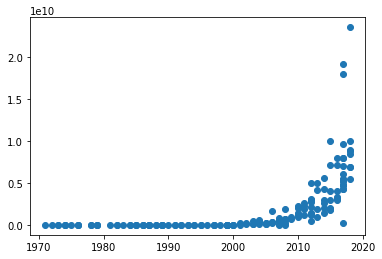

In [20]:
# plot the data - it is exponential !
plt.scatter(X, Y)

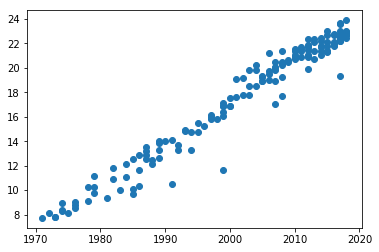

In [21]:
# Since we cant a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)

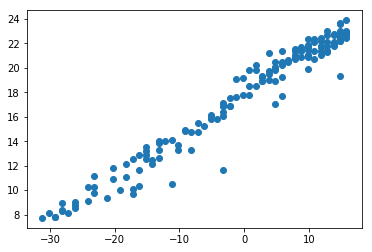

In [22]:
# Let's also center the X data so the values are not too large
# We could scale it too (divide by sigma) but then we'd have to reverse the transformation later
X = X - X.mean()
plt.scatter(X, Y)

In [23]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')


# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 309us/sample - loss: 544.9381
Epoch 2/200
162/162 [==============================] - 0s 76us/sample - loss: 477.6210
Epoch 3/200
162/162 [==============================] - 0s 64us/sample - loss: 292.9624
Epoch 4/200
162/162 [==============================] - 0s 74us/sample - loss: 262.8476
Epoch 5/200
162/162 [==============================] - 0s 85us/sample - loss: 228.4709
Epoch 6/200
162/162 [==============================] - 0s 64us/sample - loss: 135.9795
Epoch 7/200
162/162 [==============================] - 0s 67us/sample - loss: 110.7791
Epoch 8/200
162/162 [==============================] - 0s 71us/sample - loss: 72.1978
Epoch 9/200
162/162 [==============================] - 0s 70us/sample - loss: 65.0881
Epoch 10/200
162/162 [==============================] - 0s 65us/sample - loss: 32.8043
Epoch 11/200
162/162 [==============================] - 0s 72us/sample - loss: 25.4849
Epoch 12/200
162/162 [=

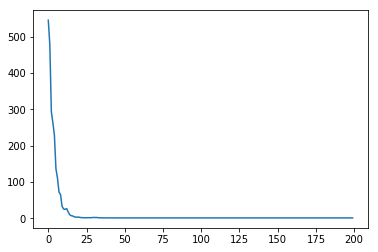

In [24]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [25]:
# Get the slope of the line
# The smlope of the line is related to the doubling rate of transisotr count
print(model.layers) # note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.34549177]], dtype=float32), array([17.758406], dtype=float32)]


In [0]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0, 0]

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [27]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.006262513054712


In [28]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


# Part 2: Making Predictions

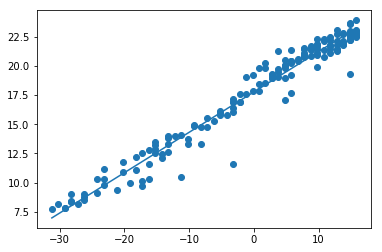

In [30]:
# Make predictions
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [31]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True